### Objective: 
Given a Bank customer, build a neural network based classifier that can determine whether they will leave or not in the next 6 months. 

### Context:
Businesses like banks which provide service have to worry about problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Data Description: 
The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance etc. Link to the Kaggle project site: https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling 

### Points Distribution: 
The points distribution for this case is as follows: 
  1. Read the dataset 
  2. Drop the columns which are unique for all users like IDs (5 points) 
  3. Distinguish the feature and target set (5 points) 
  4. Divide the data set into training and test sets (5 points) 
  5. Normalize the train and test data (10 points) 
  6. Initialize & build the model. Identify the points of improvement and implement the same the same.(20) 
  7. Predict the results using 0.5 as a threshold (10 points) 
  8. Print the Accuracy score and confusion matrix (5 points)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

In [2]:
bank = pd.read_csv(r"C:\Users\admin\Desktop\AIML\Project\Project 6\bank.csv")
bank.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
bank.shape

(10000, 14)

In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
bank.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


1. No null values
2. No negative values
3. Row Number, CustomerId are distinct columns which are not required to build a model. so we can drop it
4. CreditScore and Age are of decent number.
5. Minimum value for Tenure and balance are 0, need to look into it
6. HasCrCard, IsActiveMember, Exited are yes or no type columns and they look fine.
7. NumOfProducts is greater the 0.

In [6]:
bank.isnull().sum().sum()

0

In [7]:
#Since the customers are unique, we can drop CustomerId, RowNuber, Surname columns
bank.drop(columns={'CustomerId','Surname','RowNumber'},axis=1,inplace=True)
bank.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
for cols in bank.columns:
    if(bank[cols].dtype=='object'):
        print("Count",bank[cols].value_counts())
        print()
        print("Percentage",bank[cols].value_counts()/bank[cols].count()*100)
        print()

Count France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Percentage France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

Count Male      5457
Female    4543
Name: Gender, dtype: int64

Percentage Male      54.57
Female    45.43
Name: Gender, dtype: float64



1. Compare to Germany and Spain, France people are more in number. Germany and Spain are approximately equal in number
2. Male percentage is slightly higher than female.

In [9]:
print("Balance",bank['Balance'][bank['Balance']==0].count())
print("Tenure",bank['Tenure'][bank['Tenure']==0].count())

Balance 3617
Tenure 413


In [10]:
print(bank[bank['Tenure']==0].groupby(['Exited','IsActiveMember'])['Tenure'].count())

Exited  IsActiveMember
0       0                 140
        1                 178
1       0                  54
        1                  41
Name: Tenure, dtype: int64


Considering tenure measured in year, and customers with tenure 0 are customers those tenure is less than a year.

In [11]:
bank[bank['Balance']==0].groupby(['Exited','IsActiveMember'])['Balance'].count()

Exited  IsActiveMember
0       0                 1424
        1                 1693
1       0                  320
        1                  180
Name: Balance, dtype: int64

Customers who are active and not exited with balance 0 are less in number.

In [12]:
#converting object attributes into numeric variables.
#0: Female, 1:Male
replace = {"Geography":{"France":1,"Germany":2,"Spain":3}}
oneHotCol = ["Gender"]
bank = bank.replace(replace)

bank = pd.get_dummies(data = bank, columns=oneHotCol,drop_first=True).rename(columns={"Gender_Male":"Gender"})
bank.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,3,41,1,83807.86,1,0,1,112542.58,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,3,43,2,125510.82,1,1,1,79084.10,0,0


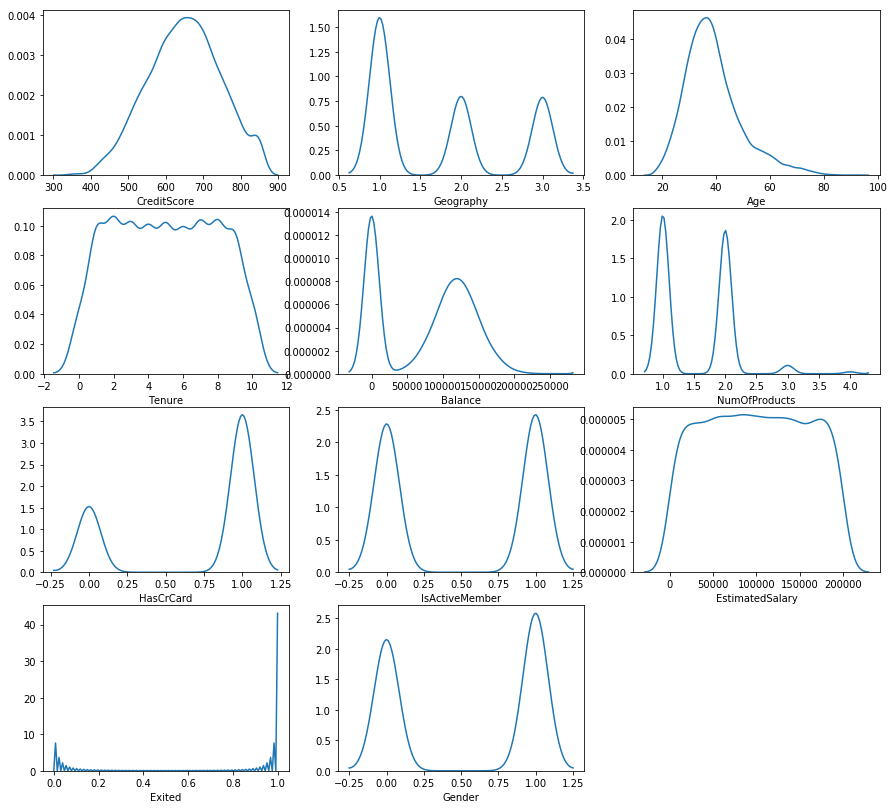

In [13]:
plt.figure(figsize=(15,14))
pos = 1
for i in bank.columns:
    plt.subplot(4,3, pos)
    sns.distplot(bank[i], hist=False)
    pos +=1

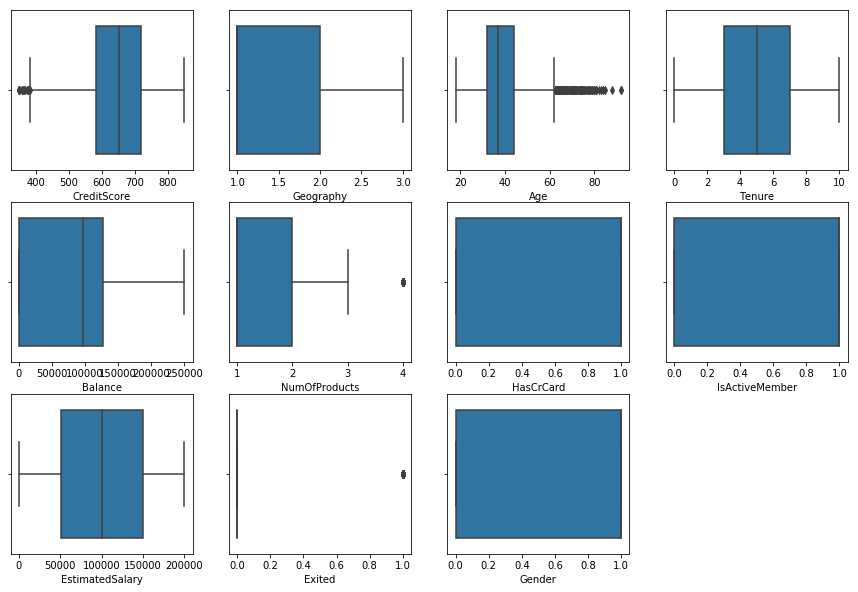

In [14]:
plt.figure(figsize=(15,10))
pos = 1
for i in bank.columns:
    plt.subplot(3,4, pos)
    sns.boxplot(bank[i])
    pos += 1 

In [15]:
##Validating outliers
for cols in bank.drop(columns='Exited').columns:
    q25 = bank[cols].quantile(0.25)
    q75 = bank[cols].quantile(0.75)
    IQR = q75 - q25
    out_count = bank[cols][((bank[cols]<(q25-IQR*1.5)) | (bank[cols]>(q75+IQR*1.5)))]
    print("Outliers present in",cols,len(out_count))

Outliers present in CreditScore 15
Outliers present in Geography 0
Outliers present in Age 359
Outliers present in Tenure 0
Outliers present in Balance 0
Outliers present in NumOfProducts 60
Outliers present in HasCrCard 0
Outliers present in IsActiveMember 0
Outliers present in EstimatedSalary 0
Outliers present in Gender 0


CreditScore,Age, NumOfProducts have outliers in very less number. I believe we can live with it. But still handling those outliers to get good accuracy.

In [16]:
bank['Exited'].value_counts()/bank['Exited'].count()*100

0    79.63
1    20.37
Name: Exited, dtype: float64

This dataset has unbalanced data in target column.

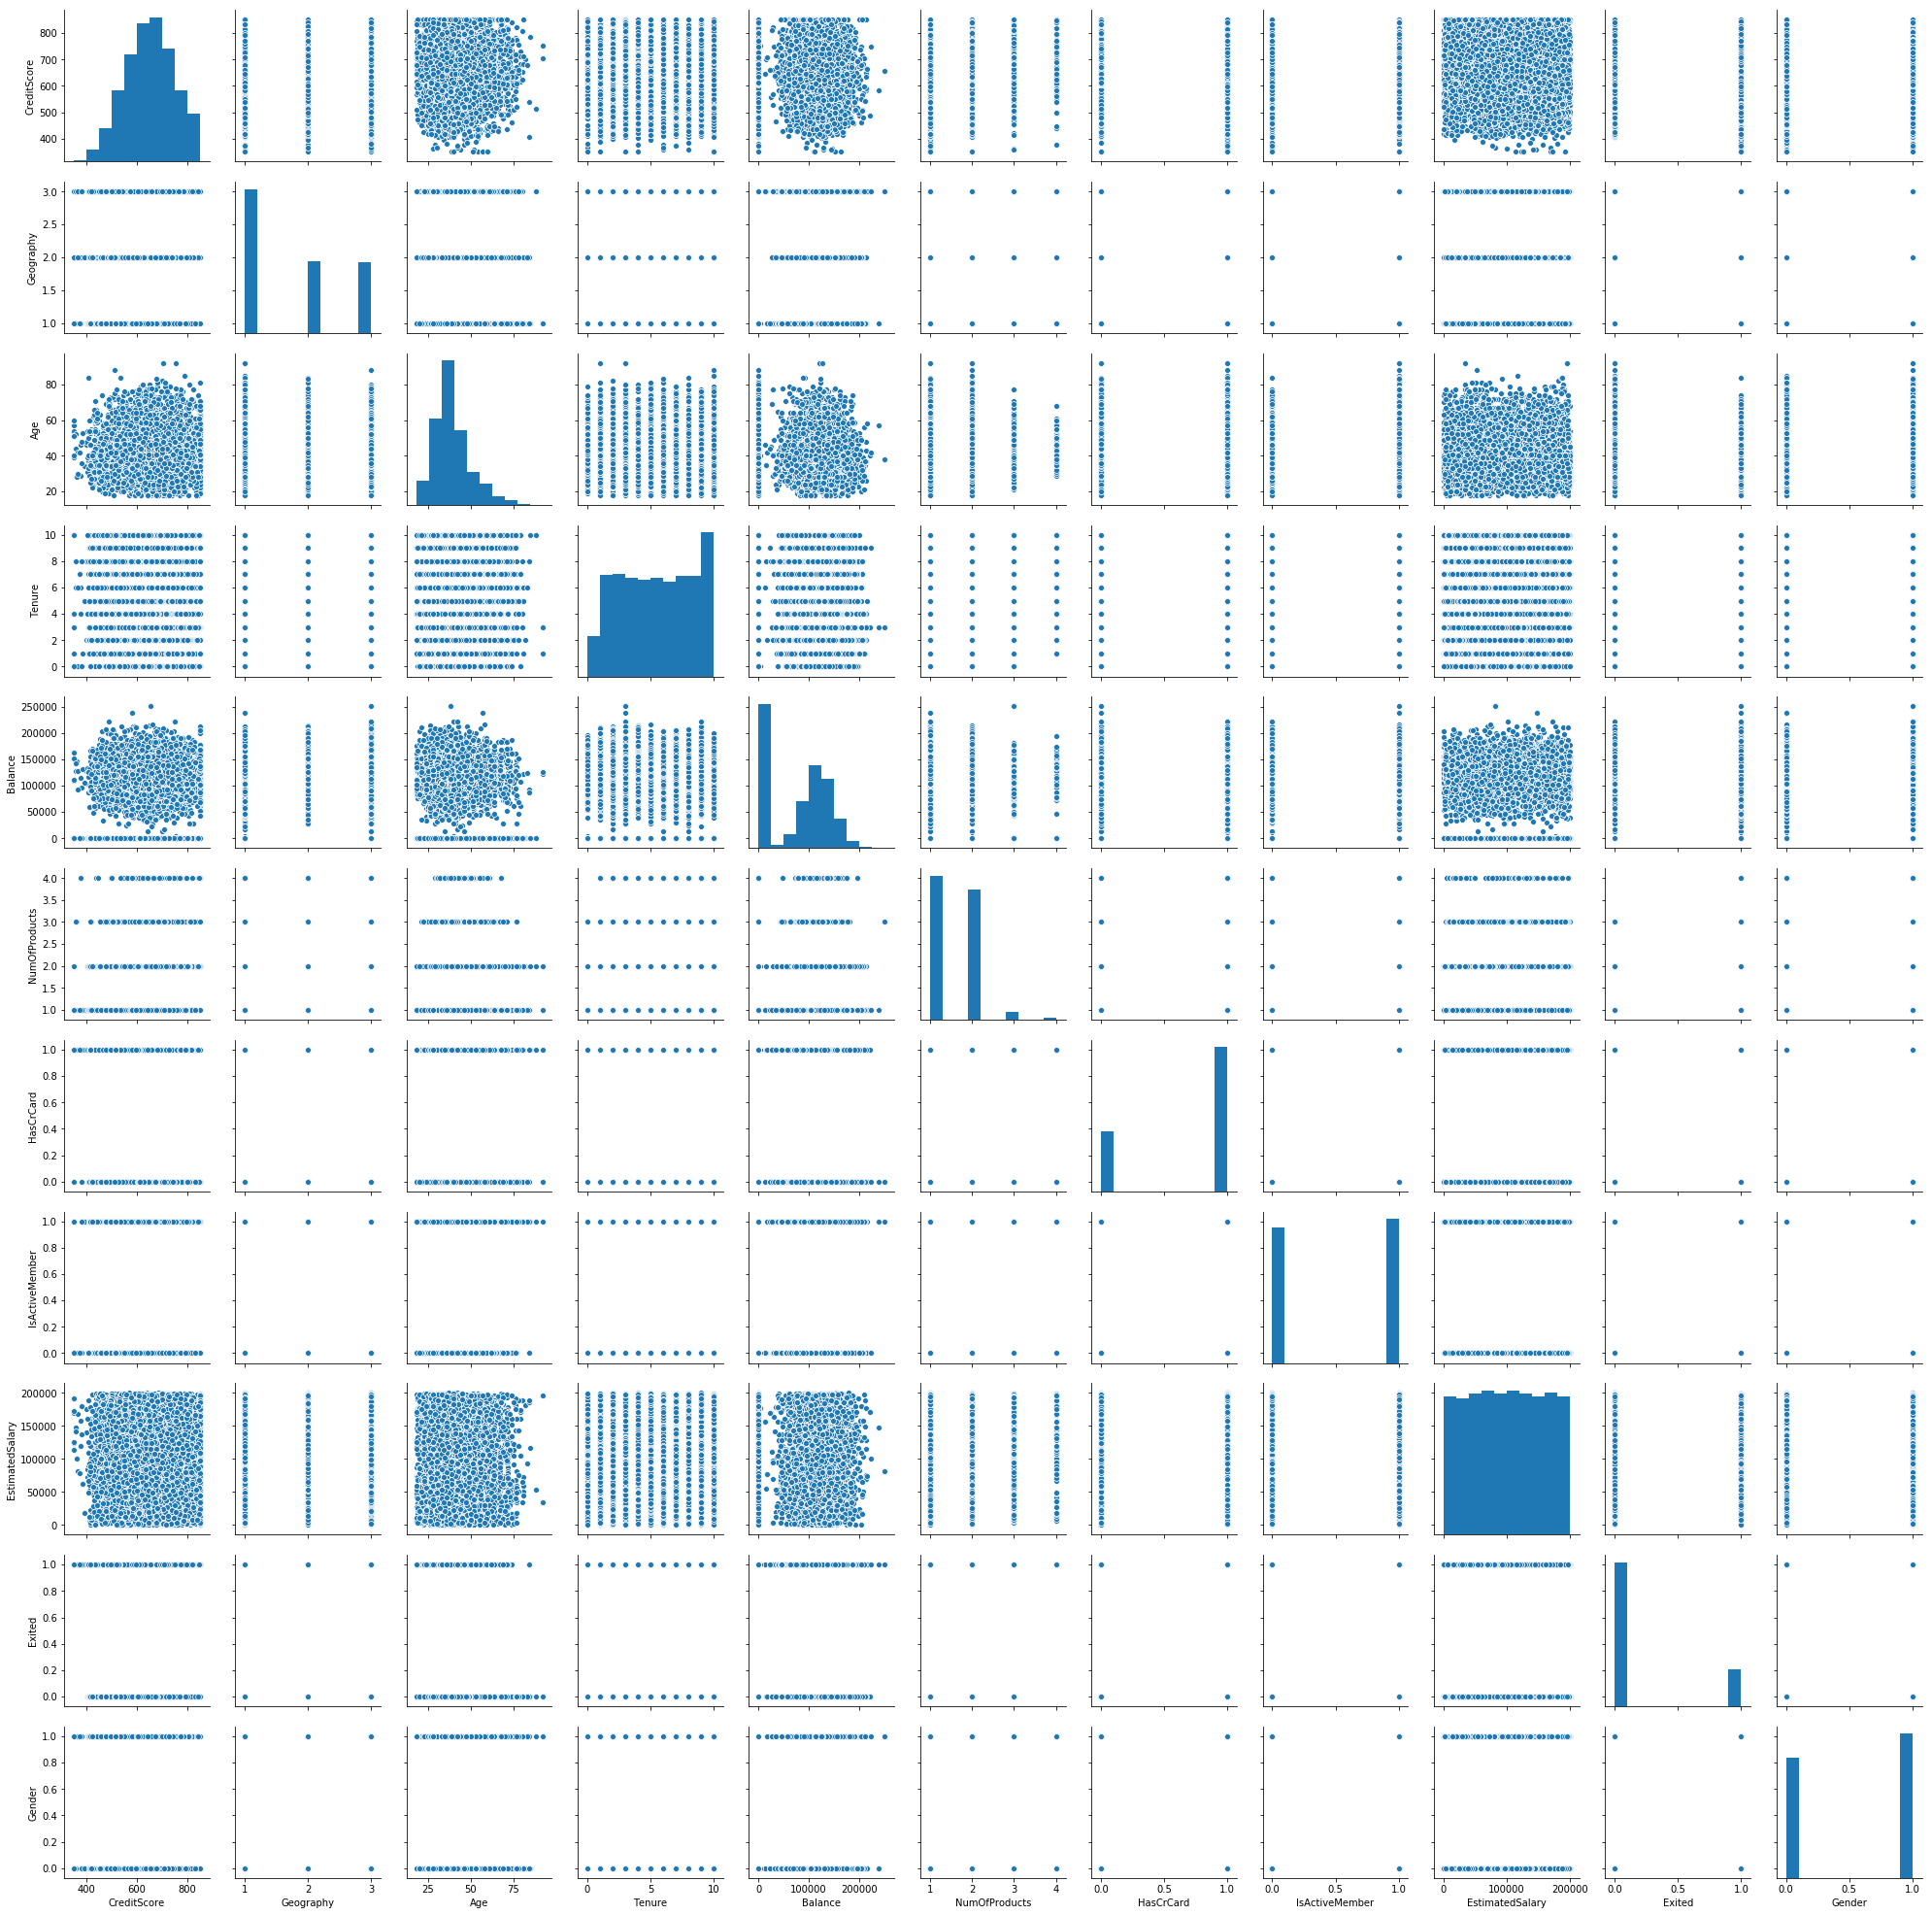

In [17]:
sns.pairplot(bank)

Seems like there is no correlation between any columns.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000017D0BA58>,
      dtype=object)

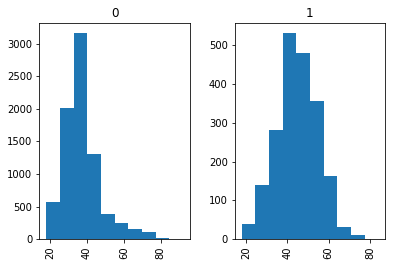

In [18]:
bank.hist(column='Age',by='Exited')

In [19]:
#Converting age
def age(bank):
    if bank["Age"]<25:
        return 'less than 25'
    if bank["Age"]>=25 and bank["Age"]<35:
        return 'less than 35'
    if bank["Age"]>=35 and bank["Age"]<45:
        return 'less than 45'
    if bank["Age"]>=45 and bank["Age"]<55:
        return 'less than 55'
    if bank["Age"]>=55 and bank["Age"]<65:
        return 'less than 65'
    if bank["Age"]>=65:
        return 'more than 65'
bank['age_gp']= bank.apply(lambda bank:age(bank) , axis=1)

In [20]:
bank.groupby(['age_gp','Exited'])['Exited'].count()

age_gp        Exited
less than 25  0          417
              1           40
less than 35  0         2972
              1          250
less than 45  0         3278
              1          703
less than 55  0          756
              1          702
less than 65  0          301
              1          299
more than 65  0          239
              1           43
Name: Exited, dtype: int64

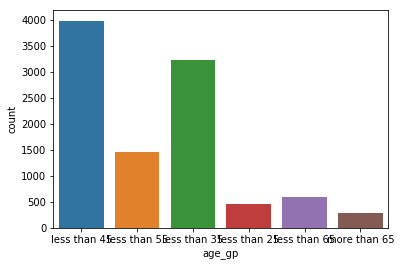

In [21]:
sns.countplot(x='age_gp',data=bank)

People around 30 and 40 have more customers who are not exited from the bank and the no.of customers are also hihg in number.

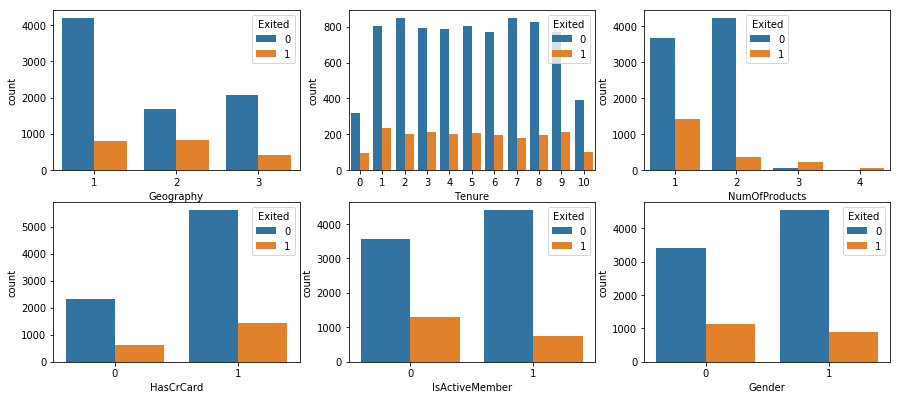

In [22]:
col = ['Geography','Tenure','NumOfProducts','HasCrCard', 'IsActiveMember','Gender']
plt.figure(figsize=(15,10))
pos = 1
for cols in col:
    #print(cols)
    plt.subplot(3,3, pos)
    sns.countplot(x=cols,data=bank,hue='Exited')
    pos += 1

Non Exited customer:
1. No exited customers are present more in France(count is also high)
2. Tenure looks like a balanced except for 0 and 10 for non exited customers.
3. Customers who are not exited has 1 or 2 products(more)
4. Most of them  credit card.
5. Most of them are active.(but inactive is slightly less than no.of active ppl).
6. Male customers are still present.

In [23]:
bank.drop(columns='age_gp',inplace=True)
bank.head(5)

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender
0,619,1,42,2,0.00,1,1,1,101348.88,1,0
1,608,3,41,1,83807.86,1,0,1,112542.58,0,0
2,502,1,42,8,159660.80,3,1,0,113931.57,1,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,0
4,850,3,43,2,125510.82,1,1,1,79084.10,0,0


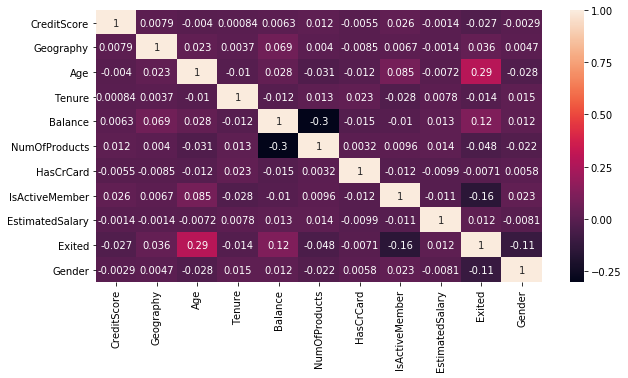

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
sns.heatmap(bank.corr(),annot=True,ax=ax)

Except Age, none of the columns are highly correlated to one another or with target column

In [25]:
X = bank.drop(columns={'Exited'},axis=1)
y = bank['Exited']

In [26]:
#Splitting dataset into training and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [27]:
##Validating outliers
q25 = X_train.quantile(0.25)
q75 = X_train.quantile(0.75)
IQR = q75 - q25
for i, j in zip(np.where(X_train<q25-1.5*IQR)[0],np.where(X_train<q25-1.5*IQR)[1]):
    val = q25-1.5*IQR
    X_train.iloc[i,j] = val[j]
for i,j in zip(np.where(X_train>q75+1.5*IQR)[0],np.where(X_train>q75+1.5*IQR)[1]):    
    val = q75+1.5*IQR
    X_train.iloc[i,j]=val[j]

C:\Users\admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


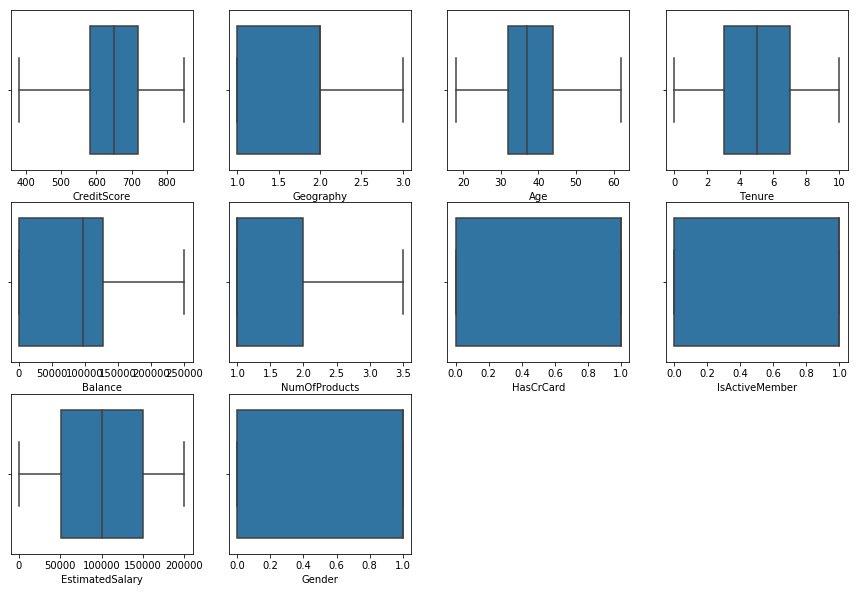

In [28]:
#After removing outliers
plt.figure(figsize=(15,10))
pos = 1
for i in X_train.columns:
    plt.subplot(3,4, pos)
    sns.boxplot(X_train[i])
    pos += 1 

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8000, 10)
(8000,)
(2000, 10)
(2000,)


In [31]:
##Creating an empty model
model = Sequential()

In [32]:
model.add(Dense(units = 6, input_shape = (10,), activation = 'relu'))
model.add(Dense(units = 6, activation = 'relu'))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [33]:
#sgd = optimizers.Adam(learning_rate=0.001)

In [34]:
#Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
#Model fitting
model.fit(X_train, y_train.values, batch_size = 35, epochs = 40, verbose = 1)

Train on 8000 samples
Epoch 1/40
8000/8000 [==============================] - 3s 394us/sample - loss: 0.5080 - accuracy: 0.7875
Epoch 2/40
8000/8000 [==============================] - 1s 82us/sample - loss: 0.4547 - accuracy: 0.7972
Epoch 3/40
8000/8000 [==============================] - 1s 92us/sample - loss: 0.4413 - accuracy: 0.7975
Epoch 4/40
8000/8000 [==============================] - 1s 90us/sample - loss: 0.4327 - accuracy: 0.7981
Epoch 5/40
8000/8000 [==============================] - 1s 86us/sample - loss: 0.4259 - accuracy: 0.8010
Epoch 6/40
8000/8000 [==============================] - 1s 86us/sample - loss: 0.4187 - accuracy: 0.8044s - loss: 0.4139 - 
Epoch 7/40
8000/8000 [==============================] - 1s 76us/sample - loss: 0.4107 - accuracy: 0.8076
Epoch 8/40
8000/8000 [==============================] - 1s 72us/sample - loss: 0.4011 - accuracy: 0.8124
Epoch 9/40
8000/8000 [==============================] - ETA: 0s - loss: 0.3935 - accuracy: 0.81 - 1s 70us/sample - los

In [36]:
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [37]:
print(model.metrics_names)
print(results)    

['loss', 'accuracy']
[0.34609528589248656, 0.8565]


In [38]:
y_pred_cls = model.predict_classes(X_test, batch_size=100, verbose=1)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [39]:
print('Accuracy Model: '+ str(round(model.evaluate(X_test,y_test.values)[1]*100,2)))
print('Recall_score: ' + str(round(recall_score(y_test,y_pred_cls),2)))
print('Precision_score: ' + str(round(precision_score(y_test, y_pred_cls),2)))
print('F-score: ' + str(round(f1_score(y_test,y_pred_cls),2)))

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model: 85.65
Recall_score: 0.43
Precision_score: 0.78
F-score: 0.55


### Print the Accuracy score and confusion matrix

In [40]:
confusion_matrix(y_test, y_pred_cls)

array([[1536,   49],
       [ 238,  177]], dtype=int64)

In [41]:
y_pred = model.predict(X_test)
y_pred

array([[0.03410861],
       [0.09168983],
       [0.06875691],
       ...,
       [0.01033512],
       [0.06474337],
       [0.32742175]], dtype=float32)

### Predict the results using 0.5 as a threshold

In [42]:
y_pred_res = (y_pred>=0.50)
y_pred_res

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_res)
print(cm)

[[1536   49]
 [ 238  177]]


In [44]:
print('Recall_score: ' + str(round(recall_score(y_test,y_pred_res),2)))
print('Precision_score: ' + str(round(precision_score(y_test, y_pred_res),2)))
print('F-score: ' + str(round(f1_score(y_test,y_pred_res),2)))

Recall_score: 0.43
Precision_score: 0.78
F-score: 0.55
